- **CustomerID:** A unique ID that identifies each customer.
- **Gender:** The customer’s gender: Male, Female
- **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No
- **Partner:**Whether the customer is married or not
- **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Tenure in Months:** Indicates the total amount of months that the customer has been with the company 
- **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. 
- **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. 
- **Streaming Music:** Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. 
- **Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.
- **Total Charges :** Indicates the customer’s total charges.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("customerchurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
##here total charges variable should be float value but showing object i.e missing values are there

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- **average tenure is 32 i.e 32 month is an average period of cutomers to staying with that service.minimum is 0 it indicates that some customers leave the service before 1 month.**
- **Average monthly charges paid by the customer is 64$**



### #data cleaning

In [7]:
df.drop("customerID",axis=1,inplace=True)

In [8]:
df["SeniorCitizen"].replace({1:"Yes",0:"No"},inplace=True)

In [9]:
df["MultipleLines"].replace("No phone service","No",inplace=True) ##NO phone services and No meaning is same
df["MultipleLines"]=df["MultipleLines"].astype("str")

In [10]:
collection=df.iloc[:,8:14]

In [11]:
collection=df.iloc[:,8:14]
for col in collection:
    df[col].replace("No internet service","No",inplace=True)
    df[col]=df[col].astype("str")
collection.tail(10)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7033,No,No,No,No,No,No
7034,Yes,Yes,Yes,No,Yes,No
7035,No,No,No,No,Yes,No
7036,No,Yes,Yes,Yes,Yes,Yes
7037,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,Yes,No,Yes,Yes,Yes,Yes
7039,No,Yes,Yes,No,Yes,Yes
7040,Yes,No,No,No,No,No
7041,No,No,No,No,No,No
7042,Yes,No,Yes,Yes,Yes,Yes


In [12]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.drop([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],axis=0,inplace=True)
df["TotalCharges"] =df["TotalCharges"].astype(float)

In [14]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# checking skewness

In [15]:
from scipy.stats import skew

In [16]:
df.skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [17]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


- **Total charges shows high skewness towords right.we could handle it by transformation,but as it showing highly correlation with tenure and monthly charges,its not good practice to handle it**

## Univariate analysis

### Responce variable (Churn)

<AxesSubplot:ylabel='Churn'>

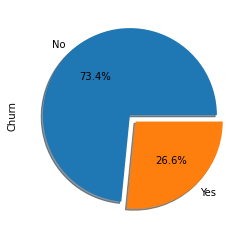

In [18]:
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

- From above graph we can observed that **26.6%** cutomers are **churners** (i.e who have left the System)and **73.4%** customers are **Loyal Customers** who doesn't have left the system.
- Dataset is imbalanced.

### Numerical univariate data analysis

<function matplotlib.pyplot.show(close=None, block=None)>

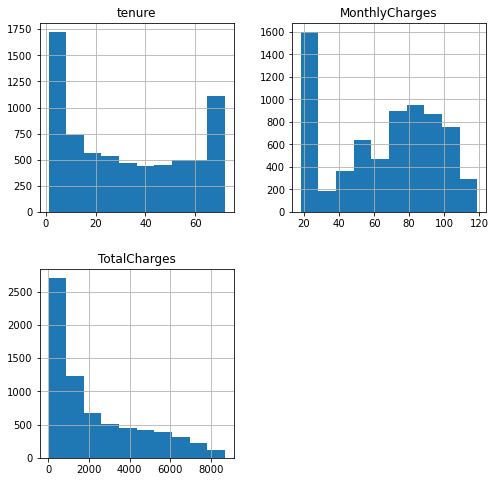

In [19]:
df.hist(bins=10,figsize=(8,8))
plt.show

 - From the above graphs as well from the statistical description we come to the conclusion that
  - **Tenure** variable is slightly **Positive skewed** (as its mean is slight greater than its median)
  - **Monthly charges** are **moderatly negatively** skewed  (its median is moderately greater than mean)
  - **Total charges** are highly **postively skewed**  (its mean is too greater than median)
  

### Categorical Univariate Analysis



gender


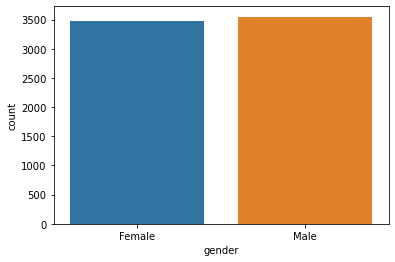

Male      50.469283
Female    49.530717
Name: gender, dtype: float64


SeniorCitizen


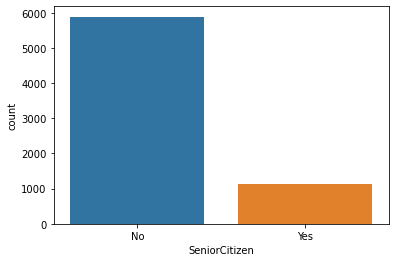

No     83.759954
Yes    16.240046
Name: SeniorCitizen, dtype: float64


Partner


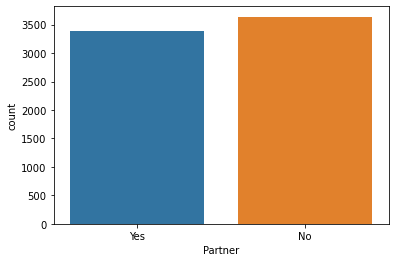

No     51.749147
Yes    48.250853
Name: Partner, dtype: float64


Dependents


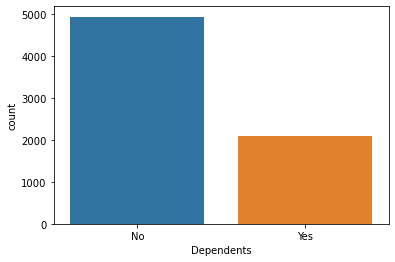

No     70.150739
Yes    29.849261
Name: Dependents, dtype: float64


PhoneService


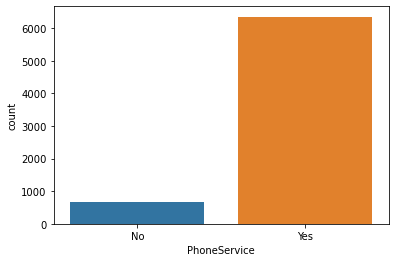

Yes    90.32992
No      9.67008
Name: PhoneService, dtype: float64


MultipleLines


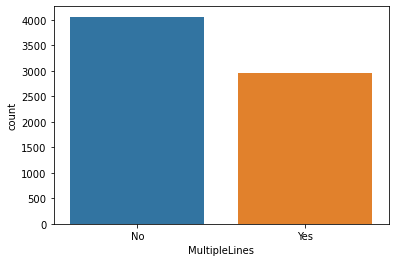

No     57.807167
Yes    42.192833
Name: MultipleLines, dtype: float64


InternetService


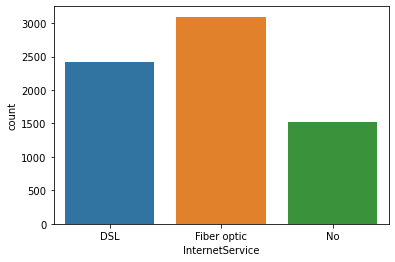

Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: InternetService, dtype: float64


OnlineSecurity


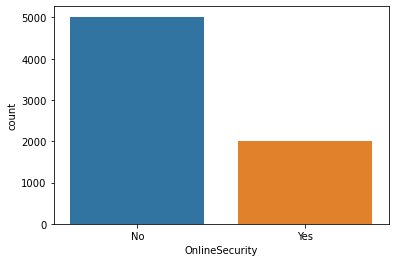

No     71.345279
Yes    28.654721
Name: OnlineSecurity, dtype: float64


OnlineBackup


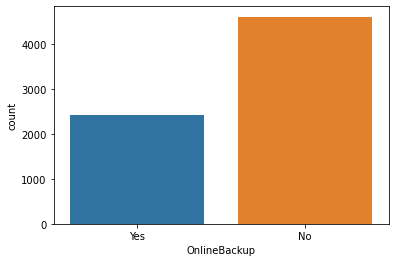

No     65.51479
Yes    34.48521
Name: OnlineBackup, dtype: float64


DeviceProtection


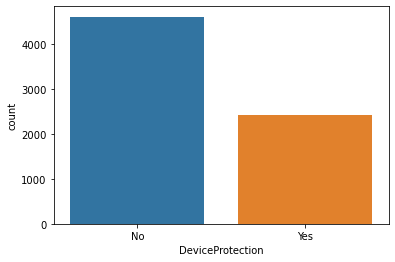

No     65.614334
Yes    34.385666
Name: DeviceProtection, dtype: float64


TechSupport


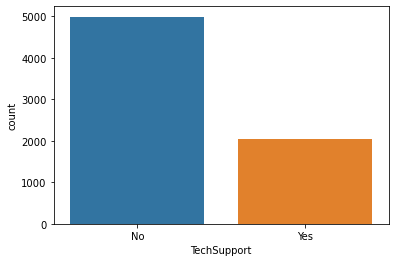

No     70.989761
Yes    29.010239
Name: TechSupport, dtype: float64


StreamingTV


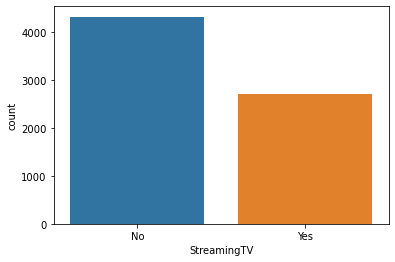

No     61.561433
Yes    38.438567
Name: StreamingTV, dtype: float64


StreamingMovies


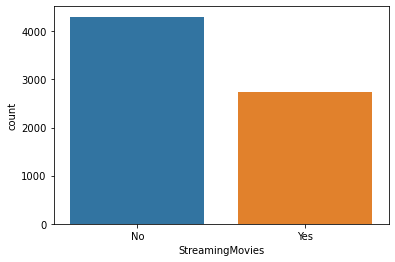

No     61.163254
Yes    38.836746
Name: StreamingMovies, dtype: float64


Contract


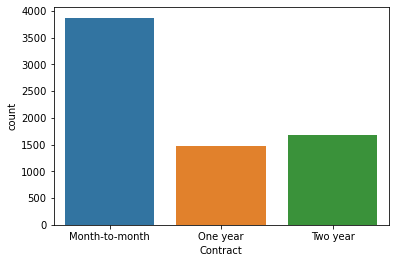

Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: Contract, dtype: float64


PaperlessBilling


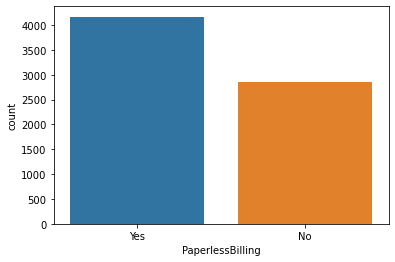

Yes    59.2719
No     40.7281
Name: PaperlessBilling, dtype: float64


PaymentMethod


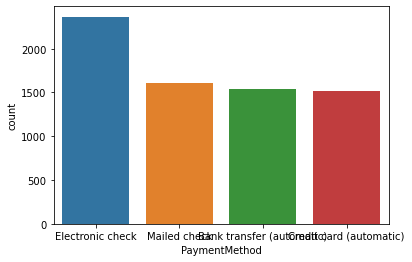

Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: PaymentMethod, dtype: float64


Churn


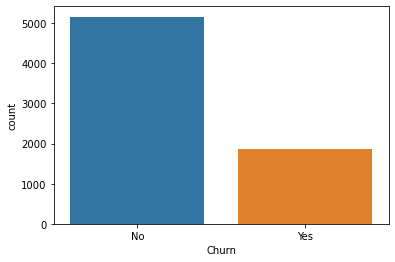

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


In [20]:
df_cat=df.select_dtypes(object)
for col in df_cat:
    print("\n")
    print(col)
    sns.countplot(data=df,x=df_cat[col])
    plt.show()
    print(f"{df_cat[col].value_counts(normalize=True)*100}")

- Percentage of male and Female individual are nearly same.
- **Only 16% people are having age greater than 65**.
- The individuals having dependents on them are more.
- **Individuals which are using home Phone serivices and multiple line services are more than that who are not using.**
- **In internate Services most of people prefer to use Fiber Optics and then DSL.**
- There are quite less people who has taken additional online security service,backup services,Device protection services from provider.(estimately upto 35-36% people taking that all extra services)
- around 38-39% of people are using service provider's network to stream tv programs offered by third party apps.
- Lot of customer prefering Month to month contract with service provider.
- **Most of the customers uses paperless billing.**
- They use Electronic check for payment.

### Bivariate Analysis(every variable with respect to Churning)

gender


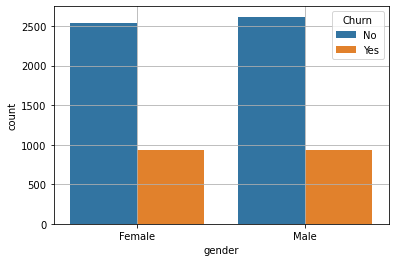

SeniorCitizen


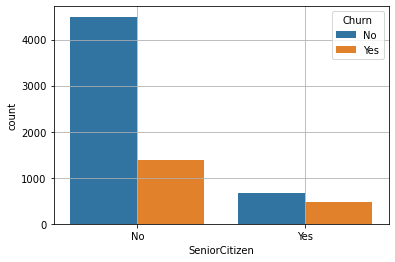

Partner


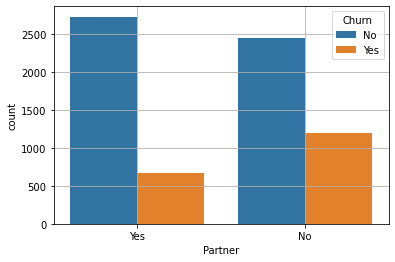

Dependents


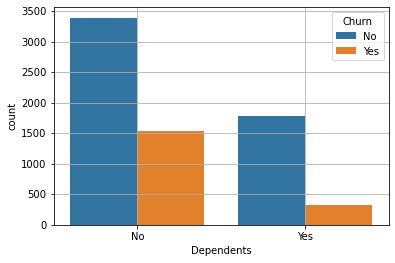

PhoneService


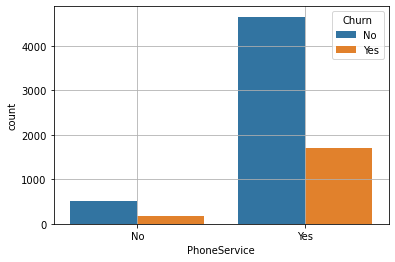

MultipleLines


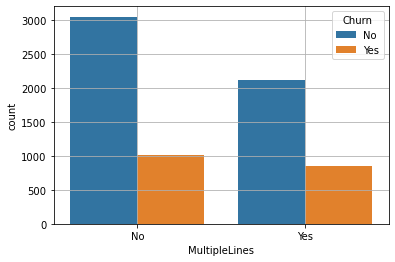

InternetService


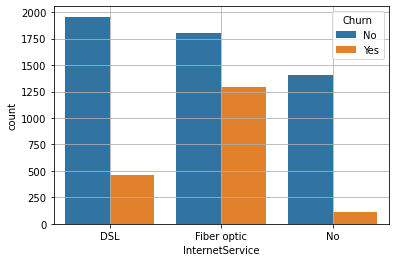

OnlineSecurity


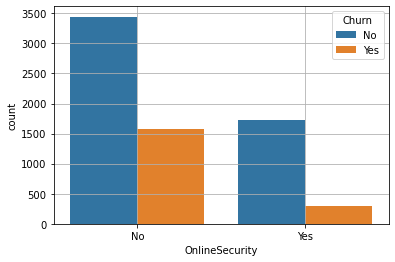

OnlineBackup


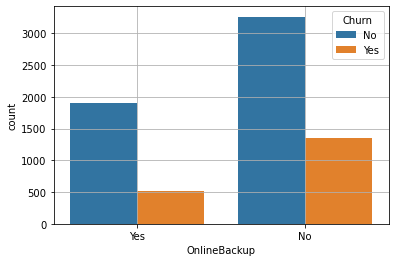

DeviceProtection


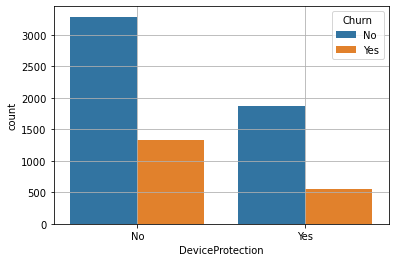

TechSupport


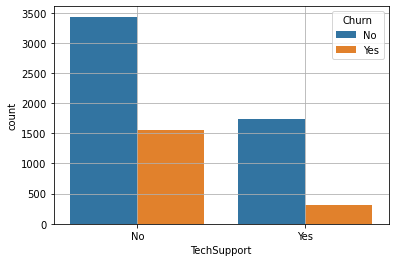

StreamingTV


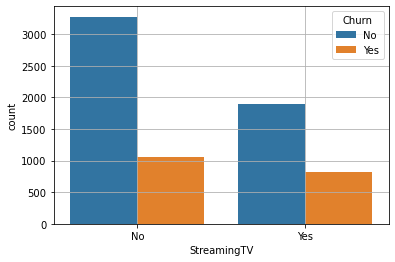

StreamingMovies


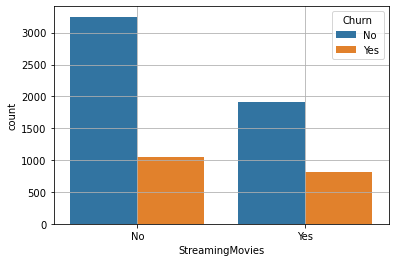

Contract


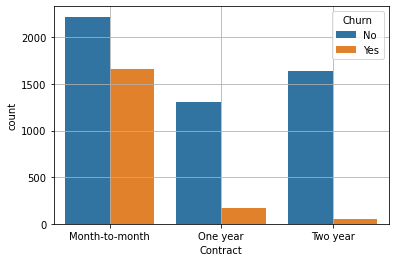

PaperlessBilling


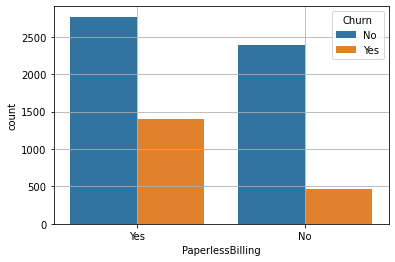

PaymentMethod


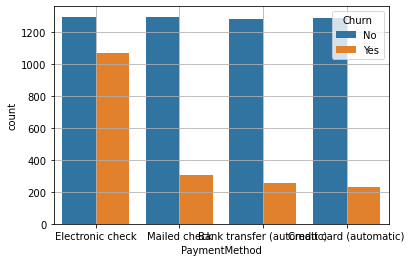

Churn


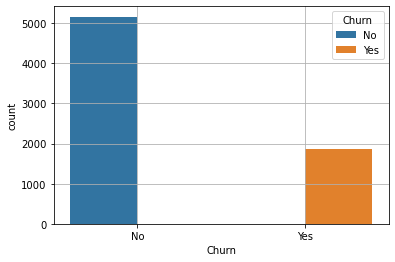

In [21]:
for col in df_cat:
    print(col)
    sns.countplot(data=df,x=df_cat[col],hue="Churn")
    plt.grid(True)
    plt.show()

-  From gender we can observe that no matter whats the gender is,they churn in almost same ratio.
-  **Non senior citizen are more likely to churn.**
- **Less churning rate when Candidate has partner or dependent.**
- People use phone service are more likely to churn( 0:-20% , 1:-40% )
- We cant say much about this variable since the ratio of churning of  multiple line user and non user is almost same and for both its quite low(0:-33% ,1:-36%)
- **Customers with internet service fiber optics are more likely to churn than another two(i.e DSL and no service)**
- Almost 47% of customers churn who doesn't take any extra online security from telco.
- **with online security ,with tech support are less likely to churn**(as they dependents on additional services)
- custmoers who doesnt take any extra online backup and device  protection plan are more percentage of churning(42%)
- **Individual who uses services like streaming movies and streaming tv are chuners,this could be happen because streaming requires high speed data which might service not provided.**
- **monthly customer are more likely to churn because of no contract terms,as they are free to go customer**
- People who use paperless billing payment method are more likely to churn
- **electronic check medium are hightest churners**

### some more thoughtful insights

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

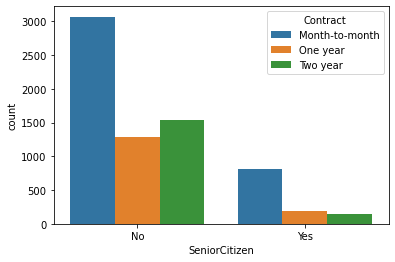

In [22]:
sns.countplot(data=df,x="SeniorCitizen",hue="Contract")

 No matter whether the individual is senior citizen or not **month to month** contract type is more preferable. 

### making interval of Tenure variable,having length 12 month each

In [23]:
bins=[0,12,24,36,48,60,72]
group_names=["0-12","12-24","24-36","36-48","48-60","60-72"]
df["tenure_group"]=pd.cut(df["tenure"],bins,labels=group_names)

In [24]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12


<AxesSubplot:xlabel='tenure_group', ylabel='count'>

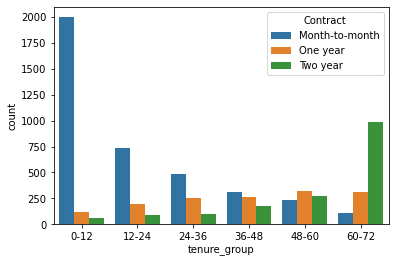

In [25]:
sns.countplot(data=df,x="tenure_group",hue="Contract")

**individual who are new in the services are mostly prefer to take month to month plan,
as period of staying increases upto 60-70 month i.e individual who are staying 5-6 years are more likely to sign contract of two year because of trust building**

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

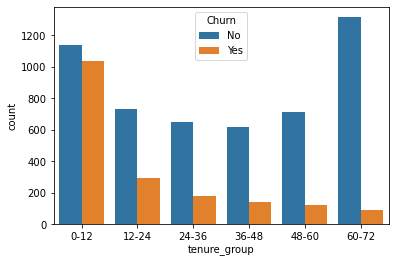

In [26]:
sns.countplot(data=df,x="tenure_group",hue="Churn")

- **we can observed from the above graph that churning rate is quite high in the cutomers who are bounded to service in between 0-12 month, as bound increases churning decreases**

In [27]:
#df.drop("tenure_group",axis=1,inplace=True)

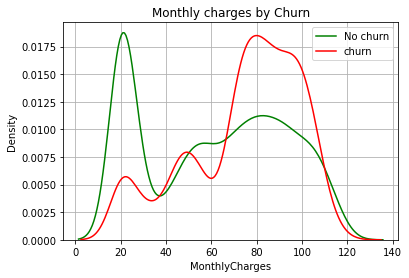

In [28]:
sns.kdeplot(df[df["Churn"]=="No"]["MonthlyCharges"],color="green",label="No churn")
sns.kdeplot(df[df["Churn"]=="Yes"]["MonthlyCharges"],color="red",label="churn")
plt.legend()
plt.title("Monthly charges by Churn")
plt.grid(True)
plt.show()

- **from graph we can state that if monthly charges are high then churning is high**

### Relationship between monthly charges and total charges

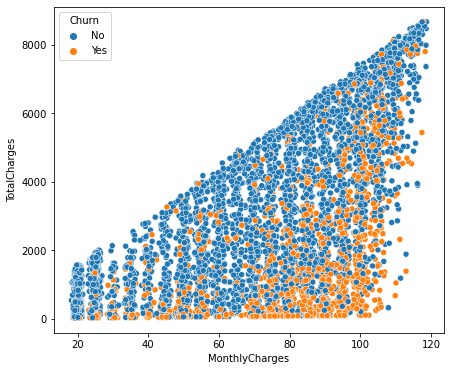

In [29]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue="Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.show()

- **Total charges and Monthly charges shows linear Relationship as expected,as monthly charges increases total charges should increase**

- Customers with spouses and childrens might churn less to keep the service running for family.
- more expensive contract leads churning.
- senior citizens tend to churn less may due to extra process of terminating contracts.
- cutomers who are using additional services are lessly likely to churn

# Label encoder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
df_cat=df.select_dtypes(object)
df_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,No,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [32]:
df_num=df.select_dtypes(["float64","int64"])
df_num

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [33]:
for col in df_cat:
    le=LabelEncoder() 
    df_cat[col]=le.fit_transform(df_cat[col])  

In [34]:
df=pd.concat([df_num,df_cat],axis=1)
df

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,2,53.85,108.15,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,3,0
7039,72,103.20,7362.90,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
7040,11,29.60,346.45,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,2,0
7041,4,74.40,306.60,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3,1


In [35]:
df.corr()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
tenure,1.000000,0.246862,0.825880,0.005285,0.015683,0.381912,0.163386,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,-0.013779,0.219874,0.097825,-0.112343,0.248033,0.490912,-0.322173,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,-0.072739,0.351930,-0.192500,0.192858
TotalCharges,0.825880,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.113008,0.469042,-0.175691,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,0.450306,0.157830,-0.330594,-0.199484
gender,0.005285,-0.013779,0.000048,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.008883,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.008545
SeniorCitizen,0.015683,0.219874,0.102411,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.150541
Partner,0.381912,0.097825,0.319072,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,-0.149982
Dependents,0.163386,-0.112343,0.064653,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.163128
PhoneService,0.007877,0.248033,0.113008,-0.007515,0.008392,0.018397,-0.001078,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.011691
MultipleLines,0.332399,0.490912,0.469042,-0.008883,0.142996,0.142561,-0.024307,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.040033
InternetService,-0.029835,-0.322173,-0.175691,-0.002236,-0.032160,0.000513,0.044030,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.047097


<AxesSubplot:>

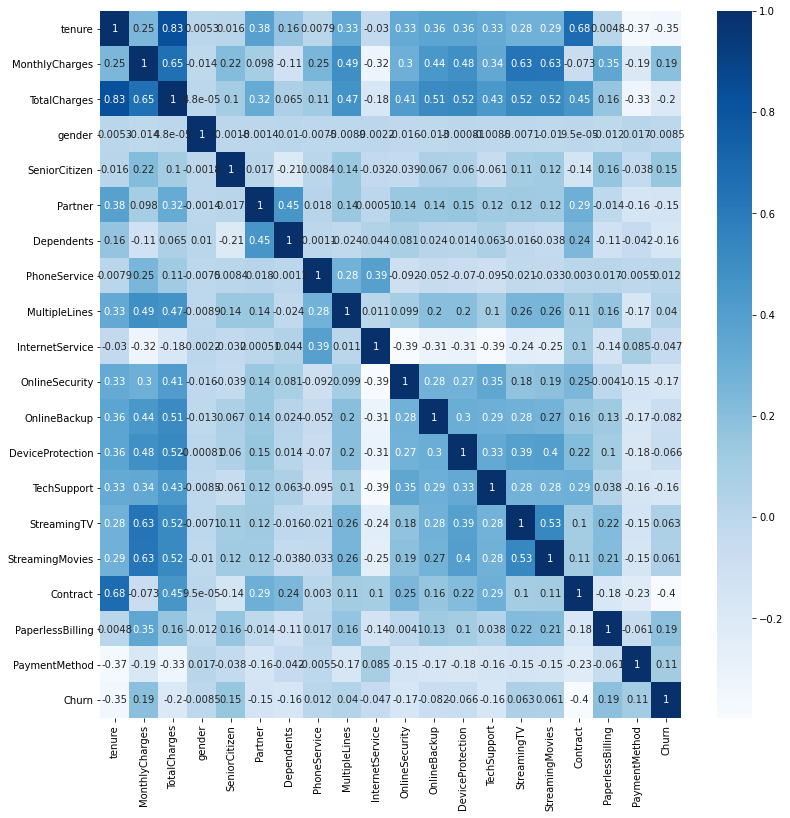

In [36]:
fig = plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

#### Droping the total charges which showing high correlation with tenure and less correlation with response variable

In [37]:
df.drop("TotalCharges",axis=1,inplace=True)
df

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,34,56.95,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,2,53.85,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,45,42.30,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,2,70.70,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,3,0
7039,72,103.20,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
7040,11,29.60,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,2,0
7041,4,74.40,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,3,1


### Standardization

In [38]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [39]:
x=df.iloc[:,:-1]
x=sd.fit_transform(x)
y=df.iloc[:,-1]

### Resampling (SMOTE+ENN)

In [40]:
ch=df[df["Churn"]==0]
not_ch=df[df["Churn"]==1]
print(ch.shape,not_ch.shape)

(5163, 19) (1869, 19)


In [41]:
#from imblearn.over_sampling import SMOTE

In [42]:
from imblearn.combine import SMOTEENN

In [43]:
sm=SMOTEENN()

In [44]:
x_res,y_res=sm.fit_sample(x,y)

In [45]:
print(x_res.shape,y_res.shape)

(6165, 18) (6165,)


In [46]:
from collections import Counter
print("original dataset shape{}".format(Counter(y)))
print("Resamapled dataset shape{}".format(Counter(y_res)))

original dataset shapeCounter({0: 5163, 1: 1869})
Resamapled dataset shapeCounter({1: 3371, 0: 2794})


In [47]:
from sklearn.model_selection import train_test_split
xr_train,xr_test,yr_train,yr_test=train_test_split(x_res,y_res,test_size=0.3,random_state=1)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logreg=LogisticRegression(solver="liblinear")
logreg.fit(xr_train,yr_train)
yr_pred=logreg.predict(xr_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(yr_test,yr_pred)
cr=classification_report(yr_test,yr_pred)
print(f"Accuracy: {ac}")
print(f"\n\n{cr}")

Accuracy: 0.9


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       826
           1       0.90      0.92      0.91      1024

    accuracy                           0.90      1850
   macro avg       0.90      0.90      0.90      1850
weighted avg       0.90      0.90      0.90      1850



#### By Logistic Regression  accuracy is 91 %

### SVM

In [51]:
from sklearn.svm import SVC

In [52]:
svm=SVC()
svm.fit(xr_train,yr_train)
yr_pred=svm.predict(xr_test)

In [53]:
models=[]
models.append(("SVM.poly:",SVC(kernel="poly")))
models.append(("SVM.RBF:",SVC(kernel="rbf")))
for name,model in models:
    print(name)
    model.fit(xr_train,yr_train)
    yr_pred=model.predict(xr_test)
    ac=accuracy_score(yr_test,yr_pred)
    cm=confusion_matrix(yr_test,yr_pred)
    cr=classification_report(yr_test,yr_pred)
    print(f"Accuracy:{ac}")
    print("\n")
    print(f"Confusion matrix:\n {cm}n\n")
    print(f"Classification report:\n {cr}")
    print("\n\n")

SVM.poly:
Accuracy:0.9302702702702703


Confusion matrix:
 [[744  82]
 [ 47 977]]n

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       826
           1       0.92      0.95      0.94      1024

    accuracy                           0.93      1850
   macro avg       0.93      0.93      0.93      1850
weighted avg       0.93      0.93      0.93      1850




SVM.RBF:
Accuracy:0.9286486486486486


Confusion matrix:
 [[747  79]
 [ 53 971]]n

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       826
           1       0.92      0.95      0.94      1024

    accuracy                           0.93      1850
   macro avg       0.93      0.93      0.93      1850
weighted avg       0.93      0.93      0.93      1850






#### By SVM Radial Basis kernel accuracy is 94 %

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf=RandomForestClassifier()
rf.fit(xr_train,yr_train)
yr_pred=rf.predict(xr_test)
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       826
           1       0.95      0.97      0.96      1024

    accuracy                           0.96      1850
   macro avg       0.96      0.95      0.95      1850
weighted avg       0.96      0.96      0.96      1850



#### Random forest which is bagging classifier giving the accuracy of 96 %

# Gridsearch cv on SVM

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
para={"C":[10,1],"gamma":[0,0.03],"kernel":["rbf"]}

In [58]:
grid=GridSearchCV(SVC(),para,verbose=1)
grid.fit(x_res,y_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 1], 'gamma': [0, 0.03], 'kernel': ['rbf']},
             verbose=1)

In [59]:
grid.best_params_

{'C': 10, 'gamma': 0.03, 'kernel': 'rbf'}

In [60]:
yr_pred=grid.predict(xr_test)

In [61]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       826
           1       0.96      0.98      0.97      1024

    accuracy                           0.97      1850
   macro avg       0.97      0.97      0.97      1850
weighted avg       0.97      0.97      0.97      1850



In [62]:
grid.score(xr_train,yr_train)

0.9821552723059096

In [63]:
grid.score(xr_test,yr_test)

0.9708108108108108

In [64]:
cm=confusion_matrix(yr_test,yr_pred)
cm

array([[ 789,   37],
       [  17, 1007]], dtype=int64)

FP=29 observations
FN= 14 observations

#### By applying grid search cv optimization technique we get an accuracy of 98 %